In [201]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns

In [202]:
data = pd.read_csv('../thread_count_constant.csv')

data = data.transpose()
data.columns = data.loc['runName']
data = data.drop(list(filter(lambda x: not x.isdigit(), data.index)), axis=0)
data.loc['mean'] = data.mean(axis=0).round().astype(int)

data

runName,eightThreads_constant,fourThreads_constant,singleThread_constant,twoThreads_constant,sixThreads_constant,fiveThreads_constant,sevenThreads_constant,threeThreads_constant
0,16879,16252,29794,15636,15808,17601,16428,17685
1,17162,15717,23848,18127,17057,14456,17926,17382
2,16801,16854,21295,20443,16779,16565,17344,17683
3,15614,15540,21102,20901,17023,15907,17526,17500
4,16131,17053,22253,21420,15825,17795,17052,17367
5,16162,15279,20364,20380,15527,16354,16138,17497
6,16995,16688,29149,20361,16824,17539,16168,16876
7,16009,15510,30163,19810,18184,16944,17488,17312
8,17531,16709,30264,20723,17370,17647,16366,17315
9,17306,17377,25714,20708,17301,15725,18148,17321


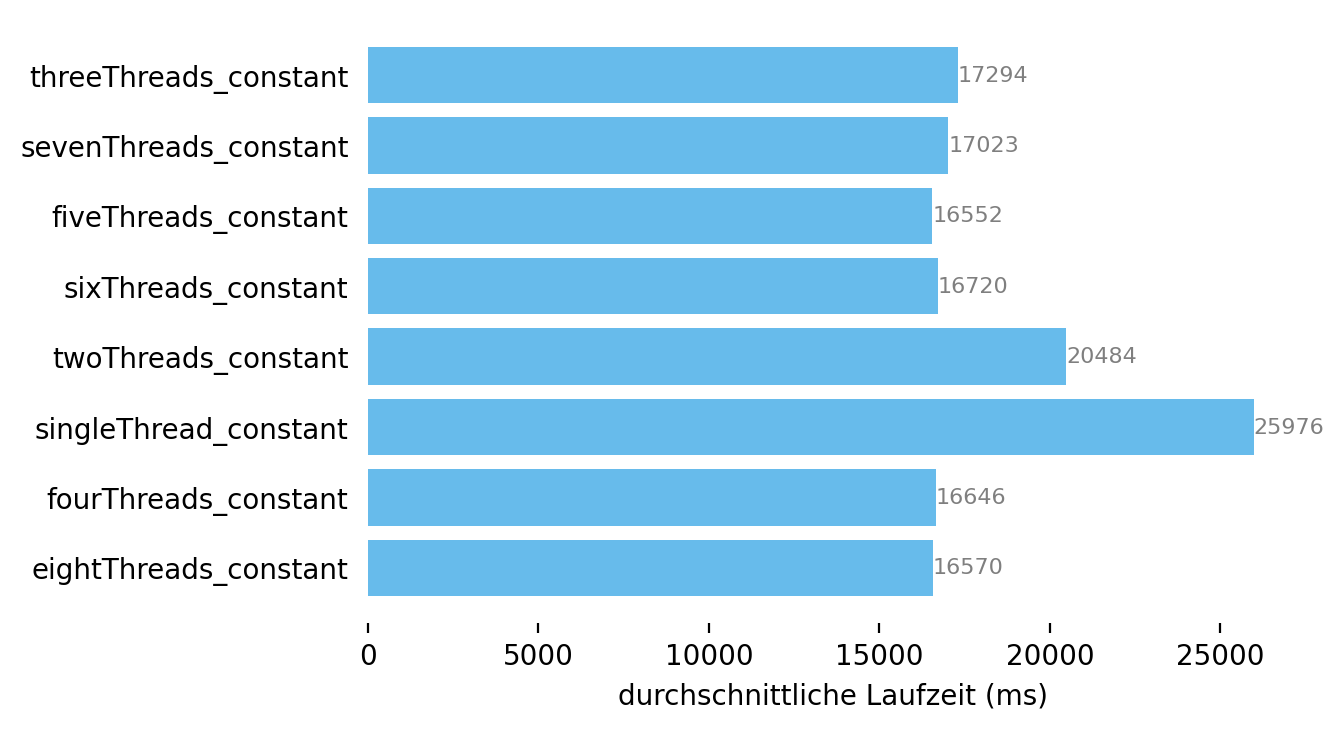

In [203]:
from matplotlib.text import Text

fig, ax = plt.subplots(figsize=(6,4), dpi=200)
bar_plot = ax.barh(data.columns, data.loc['mean'], color='#56B4E9', alpha=0.9)
ax.set(xlabel='durchschnittliche Laufzeit (ms)')
plt.tick_params(left = False)

# Die Ausführungszeit an den Balken angezeigen
for i, rect in enumerate(bar_plot):
    text: Text = plt.text(i, data.columns[i], data.loc['mean'][i], verticalalignment='center', horizontalalignment='left',alpha=0.5, fontsize=8)
    text.set_x(rect.get_width())
    

for spine in ax.spines.values():
    spine.set_visible(False)

In [204]:
fig.savefig('measurements_thread_count_new.pdf', dpi=300, bbox_inches='tight', pad_inches=0, format='pdf')

In [209]:
dataNew = {'threads': [1, 2, 3, 4, 5, 6, 7, 8], 'laufzeit': [data['singleThread_constant'].mean().round().astype(int), data['twoThreads_constant'].mean().round().astype(int), data['threeThreads_constant'].mean().round().astype(int), data['fourThreads_constant'].mean().round().astype(int), data['fiveThreads_constant'].mean().round().astype(int), data['sixThreads_constant'].mean().round().astype(int), data['sevenThreads_constant'].mean().round().astype(int), data['eightThreads_constant'].mean().round().astype(int)]}

df = pd.DataFrame(dataNew,columns=['threads','laufzeit'])
#Korrelationsmatrix erstellen
df.corr()
dataNew

{'threads': [1, 2, 3, 4, 5, 6, 7, 8],
 'laufzeit': [25976, 20484, 17294, 16646, 16552, 16720, 17023, 16570]}

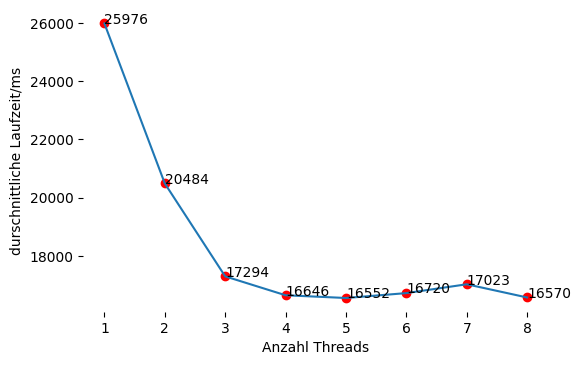

In [210]:
x, y = dataNew['threads'], dataNew['laufzeit']

fig, ax = plt.subplots(figsize=(6,4), dpi=100)
ax.scatter(x, y, color='r')
plt.plot(x, y)
plt.xlabel("Anzahl Threads")
plt.ylabel("durschnittliche Laufzeit/ms")
for i, txt in enumerate(dataNew['laufzeit']):
    ax.annotate(txt, (dataNew['threads'][i], dataNew['laufzeit'][i]))

for spine in ax.spines.values():
    spine.set_visible(False)

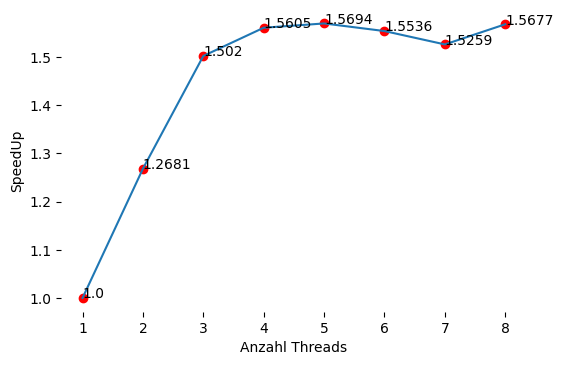

In [212]:
#Speedup
speedup = {}
for i in range(0,8):
    speedup[i+1] = round((dataNew['laufzeit'][0] / dataNew['laufzeit'][i]),4)

spArray = np.array(list(speedup.values()))
x, y = dataNew['threads'], spArray

fig, ax = plt.subplots(figsize=(6,4), dpi=100)
ax.scatter(x, y, color='r')
plt.plot(x, y)
plt.xlabel("Anzahl Threads")
plt.ylabel("SpeedUp")

for i, txt in enumerate(spArray):
    ax.annotate(txt, (dataNew['threads'][i], spArray[i]))

for spine in ax.spines.values():
    spine.set_visible(False)